<a href="https://colab.research.google.com/github/batul-hussain/Walmart_case_study/blob/main/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import statistics
import math
import scipy.stats as stats


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data (2).csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['walmart_data.csv'].decode('utf-8')))

In [ ]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#Analyzing Basic Metrics

In [ ]:
data.shape

(550068, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
data.describe(include = ['int64','object'])

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
data.notnull().sum()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category              550068
Purchase                      550068
dtype: int64

In [ ]:
#Non-Graphical Analysis

In [ ]:
data['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [ ]:
data['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
data['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [ ]:
data['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [ ]:
#Visual Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


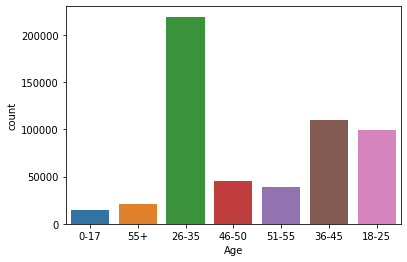

In [ ]:
sns.countplot(data['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


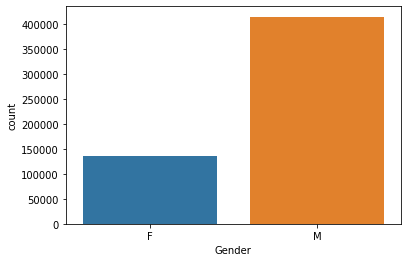

In [ ]:
sns.countplot(data['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


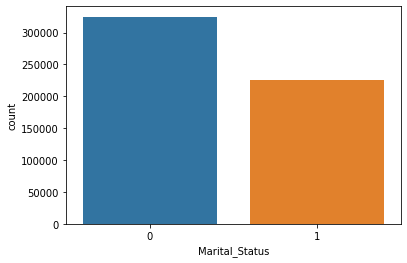

In [ ]:
sns.countplot(data['Marital_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


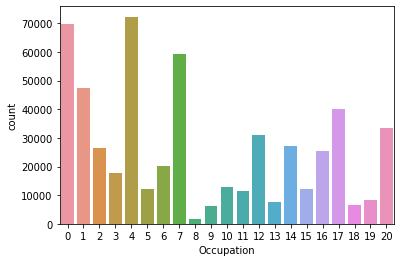

In [ ]:
sns.countplot(data['Occupation'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


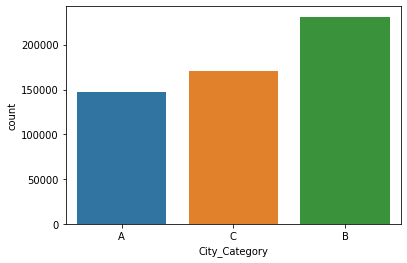

In [ ]:
sns.countplot(data['City_Category'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


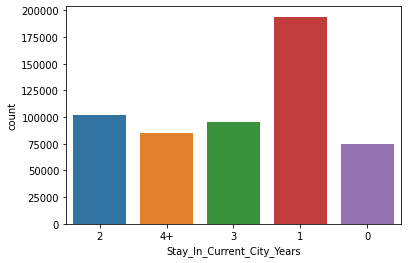

In [ ]:
sns.countplot(data['Stay_In_Current_City_Years'])

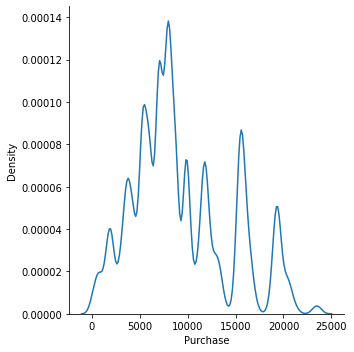

In [ ]:
sns.displot(data['Purchase'],kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


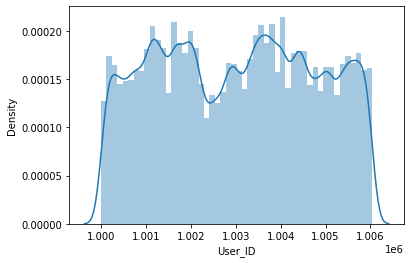

In [ ]:
sns.distplot(data['User_ID'])

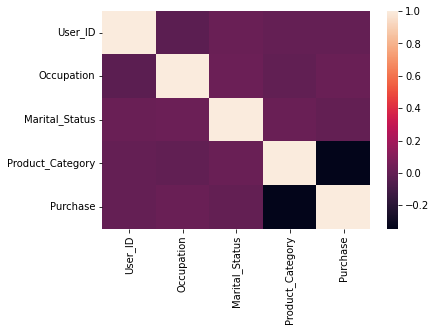

In [ ]:
sns.heatmap(data.corr())

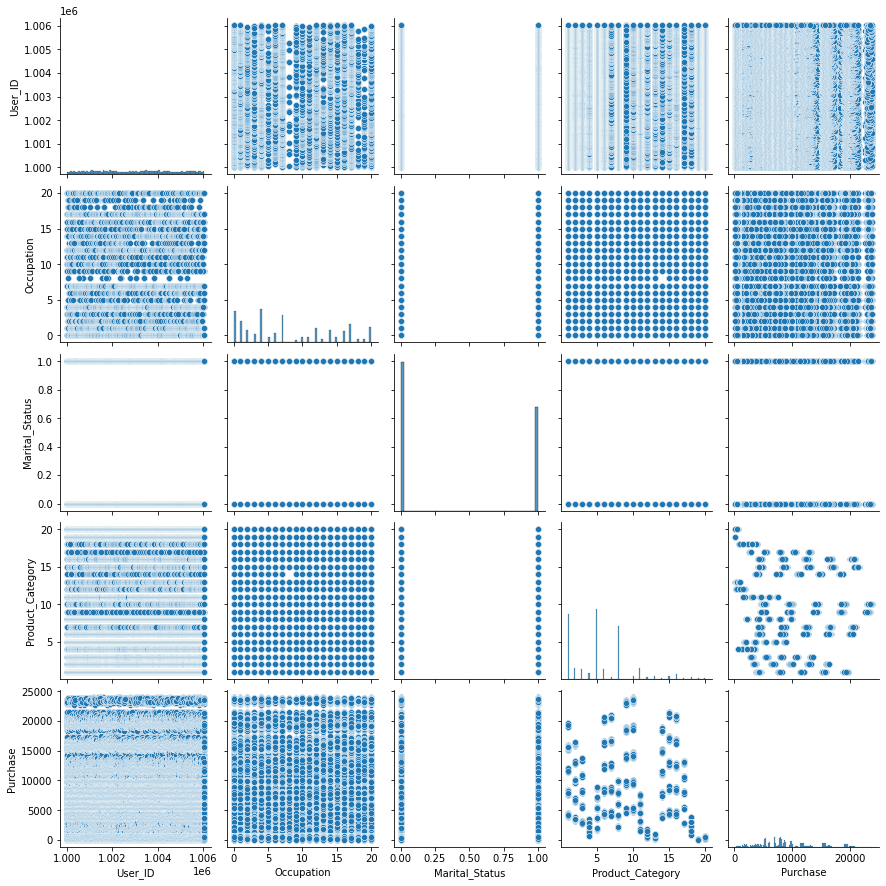

In [ ]:
sns.pairplot(data=data)

In [ ]:
#outlier detection using boxplot

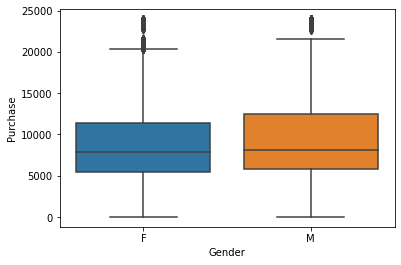

In [ ]:
sns.boxplot(data=data,x='Gender',y='Purchase',)

In [ ]:
print(data[data['Gender']=='F'].Purchase.quantile(0.25))
print(data[data['Gender']=='F'].Purchase.quantile(0.75))
print(data[data['Gender']=='M'].Purchase.quantile(0.25))
print(data[data['Gender']=='M'].Purchase.quantile(0.75))

5433.0
11400.0
5863.0
12454.0


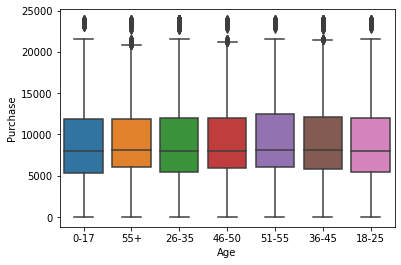

In [ ]:
sns.boxplot(data=data,x='Age',y='Purchase')

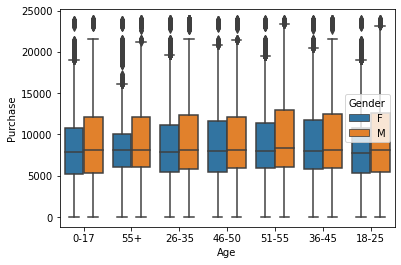

In [ ]:
sns.boxplot(data=data,x='Age',y='Purchase',hue='Gender')

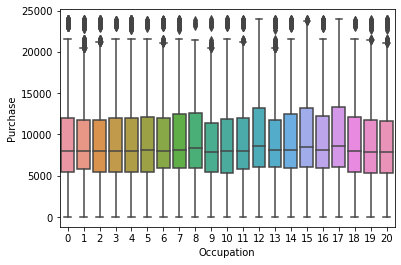

In [ ]:
sns.boxplot(data=data,x='Occupation',y='Purchase')

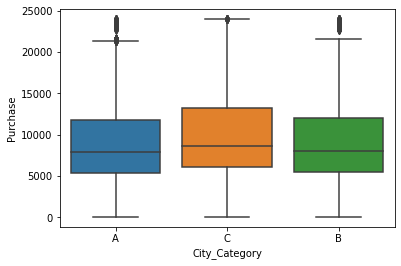

In [ ]:
sns.boxplot(data=data,x='City_Category',y='Purchase')

In [ ]:
print(data[data['City_Category']=='A'].Purchase.quantile(0.25))
print(data[data['City_Category']=='A'].Purchase.quantile(0.75))
print(data[data['City_Category']=='B'].Purchase.quantile(0.25))
print(data[data['City_Category']=='B'].Purchase.quantile(0.75))
print(data[data['City_Category']=='C'].Purchase.quantile(0.25))
print(data[data['City_Category']=='C'].Purchase.quantile(0.75))

5403.0
11786.0
5460.0
11986.0
6031.5
13197.0


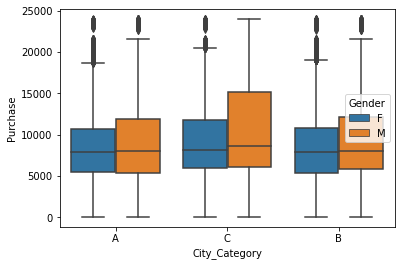

In [ ]:
sns.boxplot(data=data,x='City_Category',y='Purchase',hue = "Gender")


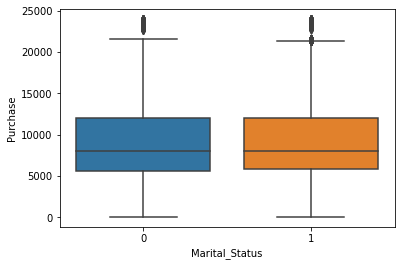

In [ ]:
sns.boxplot(data=data,x='Marital_Status',y='Purchase')

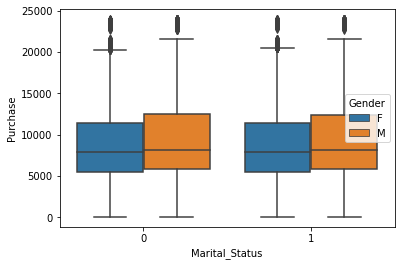

In [ ]:
sns.boxplot(data=data,x='Marital_Status',y='Purchase',hue = 'Gender')

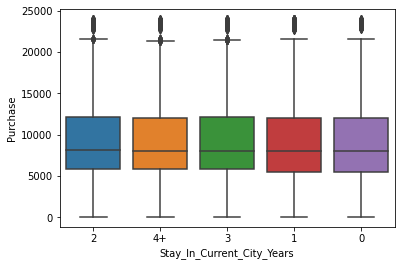

In [ ]:
sns.boxplot(data=data,x='Stay_In_Current_City_Years',y='Purchase')

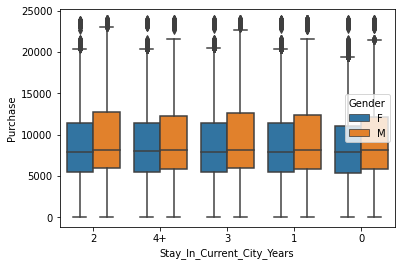

In [ ]:
sns.boxplot(data=data,x='Stay_In_Current_City_Years',y='Purchase',hue = 'Gender')

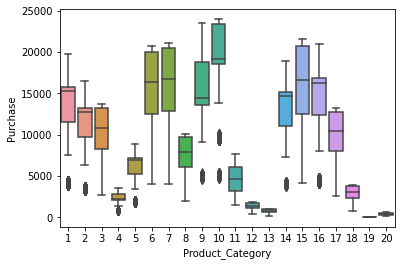

In [ ]:
sns.boxplot(data=data,x='Product_Category',y='Purchase')


In [ ]:
#IQR for outliers

In [ ]:
IQR = data.Purchase.quantile(0.75)-data.Purchase.quantile(0.25)
UL = data.Purchase.quantile(0.75) + IQR*1.5
LL = data.Purchase.quantile(0.25) + IQR*1.5

In [ ]:
data[(data['Purchase']<LL) | (data['Purchase'] > UL)].Purchase.values.tolist()

[8370,
 1422,
 1057,
 7969,
 7871,
 5254,
 3957,
 6073,
 5378,
 2079,
 13055,
 8851,
 11788,
 8584,
 9872,
 9743,
 5982,
 11927,
 5887,
 6973,
 5391,
 8886,
 5875,
 8854,
 10946,
 5152,
 7089,
 12909,
 8770,
 7947,
 8718,
 12642,
 10007,
 11562,
 6171,
 8027,
 6865,
 5839,
 12107,
 5848,
 5958,
 11415,
 5380,
 3594,
 4209,
 5407,
 7803,
 11458,
 11755,
 8702,
 8609,
 1780,
 10754,
 2802,
 13551,
 697,
 7030,
 5430,
 8011,
 5912,
 7746,
 11959,
 8773,
 11023,
 4654,
 4664,
 8290,
 7011,
 4211,
 1539,
 3055,
 12099,
 8797,
 10681,
 7801,
 12098,
 6976,
 5384,
 6973,
 5168,
 3449,
 7177,
 4570,
 9564,
 8481,
 6108,
 12015,
 11887,
 5183,
 584,
 7601,
 2230,
 6940,
 1848,
 3624,
 5275,
 5356,
 5411,
 9734,
 7814,
 6098,
 5195,
 5220,
 3702,
 8696,
 7730,
 9836,
 758,
 6904,
 8690,
 8624,
 3904,
 7963,
 11859,
 9735,
 4166,
 6927,
 8596,
 5248,
 10592,
 3482,
 7134,
 7854,
 6074,
 6119,
 6129,
 5265,
 7888,
 4035,
 5280,
 7909,
 811,
 2846,
 7994,
 3897,
 6996,
 8593,
 6917,
 5329,
 5942,
 

In [ ]:
#Are women spending more money per transaction than men

In [ ]:
df1 = data[data['Gender']=='F']
total_amt_F = df1.Purchase.sum()
no_of_F = len(df1)
amount_per_trans_F = total_amt_F/no_of_F
amount_per_trans_F

8734.565765155476

In [ ]:
df2 = data[data['Gender']=='M']
total_amt_M = df2.Purchase.sum()
no_of_M = len(df2)
amount_per_trans_M = total_amt_M/no_of_M
amount_per_trans_M

9437.526040472265

In [ ]:
#Confidence intervals of the mean of the expenses by female and male customers

In [ ]:
sampledata_F = df1.sample(n=1000)
sampledata_M = df2.sample(n=1000)

In [ ]:
samplemean_F = sampledata_F.Purchase.mean()
samplemean_M = sampledata_M.Purchase.mean()
stdev_F = statistics.stdev(sampledata_F['Purchase'])
stdev_M = statistics.stdev(sampledata_M['Purchase'])
std_error_F = stdev_F/math.sqrt(1000)
std_error_M = stdev_M/math.sqrt(1000)
z_value = 1.96
CI_F = z_value * std_error_F
CI_M = z_value * std_error_M


In [ ]:
print('Confidence Interval of mean of expenses by men is ','(',samplemean_M-CI_M,',',samplemean_M+CI_M,')')
print('Confidence Interval of mean of expenses by women is ','(',samplemean_F-CI_F,',',samplemean_F+CI_F,')')

Confidence Interval of mean of expenses by men is  ( 9076.612903649713 , 9684.259096350286 )
Confidence Interval of mean of expenses by women is  ( 8493.579985917506 , 9084.224014082494 )


In [ ]:
#Confidence intervals of the mean of the expenses by married and unmarried customers

In [ ]:
sampledata_married = data[data['Marital_Status']==1].sample(n=1000)
sampledata_unmarried = data[data['Marital_Status']==0].sample(n=1000)

In [ ]:
samplemean_married = sampledata_married.Purchase.mean()
samplemean_unmarried = sampledata_unmarried.Purchase.mean()
stdev_married = statistics.stdev(sampledata_married['Purchase'])
stdev_unmarried = statistics.stdev(sampledata_unmarried['Purchase'])
std_error_married = stdev_married/math.sqrt(1000)
std_error_unmarried = stdev_unmarried/math.sqrt(1000)
z_value = 1.96
CI_married = z_value * std_error_married
CI_unmarried = z_value * std_error_unmarried


In [ ]:
print('Confidence Interval of mean of expenses by married people is ','(',samplemean_married-CI_married,',',samplemean_married+CI_married,')')
print('Confidence Interval of mean of expenses by unmarried people is ','(',samplemean_unmarried-CI_unmarried,',',samplemean_married+CI_unmarried,')')

Confidence Interval of mean of expenses by married people is  ( 8965.168608279948 , 9566.763391720053 )
Confidence Interval of mean of expenses by unmarried people is  ( 9071.156180774191 , 9578.735819225809 )


In [ ]:
#Confidence intervals of the mean of the expenses by age

In [ ]:
sampledata_age1 = data[data['Age']=='0-17'].sample(n=1000) 
sampledata_age2 = data[data['Age']=='18-25'].sample(n=1000)
sampledata_age3 = data[data['Age']=='26-35'].sample(n=1000)
sampledata_age4 = data[data['Age']=='36-45'].sample(n=1000)
sampledata_age5 = data[data['Age']=='46-50'].sample(n=1000)
sampledata_age6 = data[data['Age']=='51-55'].sample(n=1000)
sampledata_age7 = data[data['Age']=='55+'].sample(n=1000)

In [ ]:
samplemean_age1 = sampledata_age1.Purchase.mean()
samplemean_age2 = sampledata_age2.Purchase.mean()
samplemean_age3 = sampledata_age3.Purchase.mean()
samplemean_age4 = sampledata_age4.Purchase.mean()
samplemean_age5 = sampledata_age5.Purchase.mean()
samplemean_age6 = sampledata_age6.Purchase.mean()
samplemean_age7 = sampledata_age7.Purchase.mean()

In [ ]:
stdev_age1 = statistics.stdev(sampledata_age1['Purchase'])
stdev_age2 = statistics.stdev(sampledata_age2['Purchase'])
stdev_age3 = statistics.stdev(sampledata_age3['Purchase'])
stdev_age4 = statistics.stdev(sampledata_age4['Purchase'])
stdev_age5 = statistics.stdev(sampledata_age5['Purchase'])
stdev_age6 = statistics.stdev(sampledata_age6['Purchase'])
stdev_age7 = statistics.stdev(sampledata_age7['Purchase'])

In [ ]:
std_error_age1 = stdev_age1/math.sqrt(1000)
std_error_age2 = stdev_age2/math.sqrt(1000)
std_error_age3 = stdev_age3/math.sqrt(1000)
std_error_age4 = stdev_age4/math.sqrt(1000)
std_error_age5 = stdev_age5/math.sqrt(1000)
std_error_age6 = stdev_age6/math.sqrt(1000)
std_error_age7 = stdev_age7/math.sqrt(1000)



In [ ]:
CI_age1 = z_value * std_error_age1
CI_age2 = z_value * std_error_age2
CI_age3 = z_value * std_error_age3
CI_age4 = z_value * std_error_age4
CI_age5 = z_value * std_error_age5
CI_age6 = z_value * std_error_age6
CI_age7 = z_value * std_error_age7

In [ ]:
print('Confidence Interval of mean of expenses by people of age 0-17 is ','(',samplemean_age1-CI_age1,',',samplemean_age1+CI_age1,')')
print('Confidence Interval of mean of expenses by people of age 18-25 is ','(',samplemean_age1-CI_age2,',',samplemean_age1+CI_age2,')')
print('Confidence Interval of mean of expenses by people of age 26-35 is ','(',samplemean_age1-CI_age3,',',samplemean_age1+CI_age3,')')
print('Confidence Interval of mean of expenses by people of age 36-45 is ','(',samplemean_age1-CI_age4,',',samplemean_age1+CI_age4,')')
print('Confidence Interval of mean of expenses by people of age 46-50 is ','(',samplemean_age1-CI_age5,',',samplemean_age1+CI_age5,')')
print('Confidence Interval of mean of expenses by people of age 51-55 is ','(',samplemean_age1-CI_age6,',',samplemean_age1+CI_age6,')')
print('Confidence Interval of mean of expenses by people of age 55+ is ','(',samplemean_age1-CI_age7,',',samplemean_age1+CI_age7,')')

Confidence Interval of mean of expenses by people of age 0-17 is  ( 8679.319296184643 , 9325.864703815358 )
Confidence Interval of mean of expenses by people of age 18-25 is  ( 8683.613380288742 , 9321.57061971126 )
Confidence Interval of mean of expenses by people of age 26-35 is  ( 8690.023861892685 , 9315.160138107316 )
Confidence Interval of mean of expenses by people of age 36-45 is  ( 8695.31798493432 , 9309.866015065681 )
Confidence Interval of mean of expenses by people of age 46-50 is  ( 8703.337416529463 , 9301.846583470538 )
Confidence Interval of mean of expenses by people of age 51-55 is  ( 8681.44541151014 , 9323.738588489861 )
Confidence Interval of mean of expenses by people of age 55+ is  ( 8697.357856020397 , 9307.826143979604 )


In [ ]:
#Confidence intervals of the mean of the expenses by city category

In [ ]:
sampledata_catA = data[data['City_Category']=='A'].sample(n=1000)
sampledata_catB = data[data['City_Category']=='B'].sample(n=1000)
sampledata_catC = data[data['City_Category']=='C'].sample(n=1000)

In [ ]:
samplemean_catA = sampledata_catA.Purchase.mean()
samplemean_catB = sampledata_catB.Purchase.mean()
samplemean_catC = sampledata_catC.Purchase.mean()
stdev_catA = statistics.stdev(sampledata_catA['Purchase'])
stdev_catB = statistics.stdev(sampledata_catB['Purchase'])
stdev_catC = statistics.stdev(sampledata_catC['Purchase'])
std_error_catA = stdev_catA/math.sqrt(1000)
std_error_catB = stdev_catB/math.sqrt(1000)
std_error_catC = stdev_catC/math.sqrt(1000)
z_value = 1.96
CI_catA = z_value * std_error_catA
CI_catB = z_value * std_error_catB
CI_catC = z_value * std_error_catC

In [ ]:
print('Confidence Interval of mean of expenses by people who live in City Category A is ','(',samplemean_catA-CI_catA,',',samplemean_catA+CI_catA,')')
print('Confidence Interval of mean of expenses by people who live in City Category B is','(',samplemean_catB-CI_catB,',',samplemean_catB+CI_catB,')')
print('Confidence Interval of mean of expenses by people who live in City Category C is','(',samplemean_catC-CI_catC,',',samplemean_catC+CI_catC,')')

Confidence Interval of mean of expenses by people who live in City Category A is  ( 8729.62842497533 , 9323.97557502467 )
Confidence Interval of mean of expenses by people who live in City Category B is ( 8883.850467522172 , 9502.463532477826 )
Confidence Interval of mean of expenses by people who live in City Category C is ( 9163.412846263793 , 9796.473153736206 )


In [ ]:
#Confidence intervals of the mean of the expenses by Stay in current city years

In [ ]:
sampledata_0 = data[data['Stay_In_Current_City_Years']=='0'].sample(n=1000)
sampledata_1 = data[data['Stay_In_Current_City_Years']=='1'].sample(n=1000)
sampledata_2 = data[data['Stay_In_Current_City_Years']=='2'].sample(n=1000)
sampledata_3 = data[data['Stay_In_Current_City_Years']=='3'].sample(n=1000)
sampledata_4 = data[data['Stay_In_Current_City_Years']=='4+'].sample(n=1000) 


In [ ]:
samplemean_0 = sampledata_0.Purchase.mean()
samplemean_1 = sampledata_1.Purchase.mean()
samplemean_2 = sampledata_2.Purchase.mean()
samplemean_3 = sampledata_3.Purchase.mean()
samplemean_4 = sampledata_4.Purchase.mean()


In [ ]:
stdev_0 = statistics.stdev(sampledata_0['Purchase'])
stdev_1 = statistics.stdev(sampledata_1['Purchase'])
stdev_2 = statistics.stdev(sampledata_2['Purchase'])
stdev_3 = statistics.stdev(sampledata_3['Purchase'])
stdev_4 = statistics.stdev(sampledata_4['Purchase'])

In [ ]:
std_error_0 = stdev_0/math.sqrt(1000)
std_error_1 = stdev_1/math.sqrt(1000)
std_error_2 = stdev_2/math.sqrt(1000)
std_error_3 = stdev_3/math.sqrt(1000)
std_error_4 = stdev_4/math.sqrt(1000)




In [ ]:
CI_0 = z_value * std_error_0
CI_1 = z_value * std_error_1
CI_2 = z_value * std_error_2
CI_3 = z_value * std_error_3
CI_4 = z_value * std_error_4

In [ ]:
print('Confidence Interval of mean of expenses by people who have lived in City for 0 year ','(',samplemean_0-CI_0,',',samplemean_0+CI_0,')')
print('Confidence Interval of mean of expenses by people who have lived in City for 1 year','(',samplemean_1-CI_1,',',samplemean_1+CI_1,')')
print('Confidence Interval of mean of expenses by people who have lived in City for 2 years','(',samplemean_2-CI_2,',',samplemean_2+CI_2,')')
print('Confidence Interval of mean of expenses by people who have lived in City for 3 years','(',samplemean_3-CI_3,',',samplemean_3+CI_3,')')
print('Confidence Interval of mean of expenses by people who have lived in City for 4+ years','(',samplemean_4-CI_4,',',samplemean_4+CI_4,')')

Confidence Interval of mean of expenses by people who have lived in City for 0 year  ( 8567.631684612314 , 9186.982315387688 )
Confidence Interval of mean of expenses by people who have lived in City for 1 year ( 9056.583262720997 , 9677.094737279003 )
Confidence Interval of mean of expenses by people who have lived in City for 2 years ( 9045.232179365614 , 9675.397820634387 )
Confidence Interval of mean of expenses by people who have lived in City for 3 years ( 8511.07967902853 , 9114.336320971472 )
Confidence Interval of mean of expenses by people who have lived in City for 4+ years ( 8886.170134941684 , 9506.765865058318 )


In [ ]:
## Visialization of CLT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


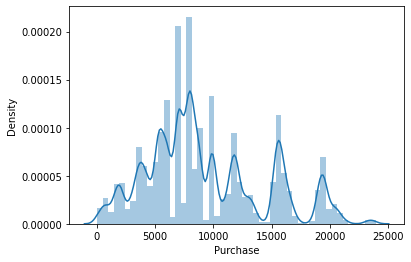

In [ ]:
sns.distplot(data['Purchase']) #representation of data

In [ ]:
mean = []
def calc_sample_mean(sample_size,no_of_sample_means) :
  for i in range(no_of_sample_means) :
    sample_base_purchase = data['Purchase'].sample(n=sample_size)
    sample_mean = sample_base_purchase.mean()
    mean.append(sample_mean)
  return mean


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

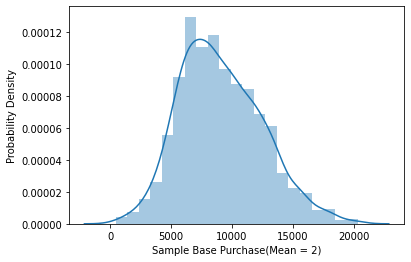

In [ ]:
#lets use above function to calculate mean and plot the distribution for sample_size = 2
mean_2 = calc_sample_mean(2,1000)
sns.distplot(mean_2)
plt.xlabel('Sample Base Purchase(Mean = 2)')
plt.ylabel('Probability Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

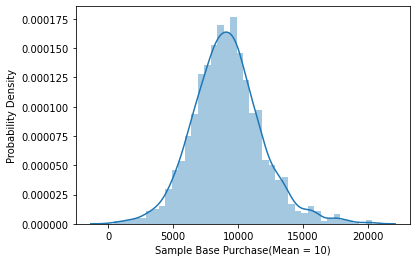

In [ ]:
#lets use above function to calculate mean and plot the distribution for sample_size = 10
mean_10 = calc_sample_mean(10,1000)
sns.distplot(mean_10)
plt.xlabel('Sample Base Purchase(Mean = 10)')
plt.ylabel('Probability Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

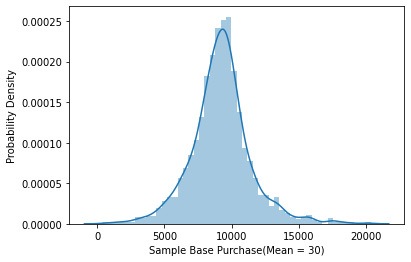

In [ ]:
#lets use above function to calculate mean and plot the distribution for sample_size = 30
mean_30 = calc_sample_mean(30,1000)
sns.distplot(mean_30)
plt.xlabel('Sample Base Purchase(Mean = 30)')
plt.ylabel('Probability Density')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Probability Density')

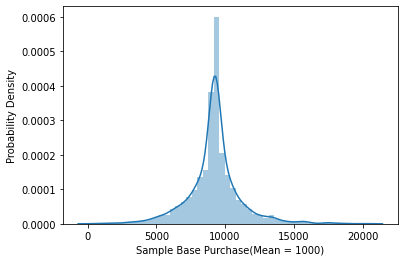

In [ ]:
#lets use above function to calculate mean and plot the distribution for sample_size = 1000
mean_1000 = calc_sample_mean(1000,1000)
sns.distplot(mean_1000)
plt.xlabel('Sample Base Purchase(Mean = 1000)')
plt.ylabel('Probability Density')